# Importing Packages

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Download the house price dataset

In [78]:
!wget https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/house_price_prediction.csv

--2022-08-28 16:13:09--  https://nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com/otg_prod/media/Tech_4.0/AI_ML/Datasets/house_price_prediction.csv
Resolving nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)... 52.219.158.54
Connecting to nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com (nkb-backend-otg-media-static.s3.ap-south-1.amazonaws.com)|52.219.158.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 319132 (312K) [text/csv]
Saving to: ‘house_price_prediction.csv.2’

house_price_predict 100%[===================>] 311.65K   361KB/s    in 0.9s    

2022-08-28 16:13:10 (361 KB/s) - ‘house_price_prediction.csv.2’ saved [319132/319132]



In [79]:
df = pd.read_csv('house_price_prediction.csv')
df

,Avg. Area Income,House Age,Number of Rooms,Number of Bedrooms,Area Population,Price
0,79248.642455,6.00,6.0,3.0,40173.072174,1.505891e+06
1,61287.067179,5.87,8.0,5.0,36882.159400,1.058988e+06
2,61287.067179,5.87,8.0,5.0,36882.159400,1.058988e+06
3,63345.240046,7.19,5.0,3.0,34310.242831,1.260617e+06
4,59982.197226,5.04,7.0,4.0,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4998,60567.944140,7.83,6.0,3.0,22837.361035,1.060194e+06
4999,78491.275435,7.00,6.0,4.0,25616.115489,1.482618e+06
5000,63390.686886,7.25,4.0,2.0,33266.145490,1.030730e+06
5001,68001.331235,5.53,7.0,5.0,42625.620156,1.198657e+06


# Data Preporcessing

## Handling NaN values

In [80]:
df.isna().sum()

Avg. Area Income      0
House Age             1
Number of Rooms       1
Number of Bedrooms    1
Area Population       1
Price                 2
dtype: int64

In [81]:
df.dropna(inplace=True)

## Handling Duplicates

In [82]:
df.duplicated().sum()

3

In [83]:
df.drop_duplicates(inplace=True)

## Handling Outliners

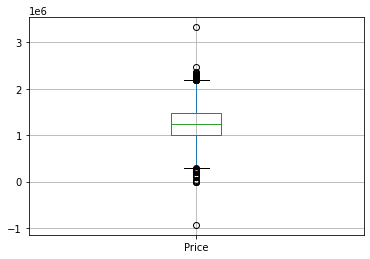

In [84]:
df.boxplot(column='Price')

In [85]:
df = df.loc[(df['Price'] <3000000) & (df['Price'] > 5)]

In [86]:
housing_price = df.to_numpy()

In [87]:
housing_price

array([[7.92486425e+04, 6.00000000e+00, 6.00000000e+00, 3.00000000e+00,
        4.01730722e+04, 1.50589091e+06],
       [6.12870672e+04, 5.87000000e+00, 8.00000000e+00, 5.00000000e+00,
        3.68821594e+04, 1.05898799e+06],
       [6.33452400e+04, 7.19000000e+00, 5.00000000e+00, 3.00000000e+00,
        3.43102428e+04, 1.26061681e+06],
       ...,
       [6.33906869e+04, 7.25000000e+00, 4.00000000e+00, 2.00000000e+00,
        3.32661455e+04, 1.03072958e+06],
       [6.80013312e+04, 5.53000000e+00, 7.00000000e+00, 5.00000000e+00,
        4.26256202e+04, 1.19865687e+06],
       [6.55105818e+04, 5.99000000e+00, 6.00000000e+00, 4.00000000e+00,
        4.65012838e+04, 1.29895048e+06]])

# Gradient Descent

## Compute cost function

In [88]:
def compute_cost_function(X, Y, theta):
  X = np.insert(X, 0, 1, axis = 1)
  H = np.dot(X, theta)
  difference = H - Y
  m = len(X)
  J = (1/(2*m)) * np.dot(difference.T, difference)
  return np.squeeze(J)

## Gradient Descent Function

In [89]:
def gradient_descent_cost_function(X, Y, theta):
  X = np.insert(X, 0, 1, axis = 1)
  H = np.dot(X, theta)
  difference = H - Y
  m = len(X)
  d_theta = (1/m) * (np.dot(X.T, difference))
  return d_theta 

#using fixed number of iterations
def gradient_descent_iterations(X, Y, theta, iterations, learning_rate):
  costs = [compute_cost_function(X, Y, theta)]
  thetas = [theta]

  for i in range(iterations):
    d_theta = gradient_descent_cost_function(X, Y, theta)
    theta = theta - (learning_rate * d_theta)
    costs.append(compute_cost_function(X, Y, theta))
    thetas.append(theta)
  return thetas, costs
  
# using gradient descent based on cost difference
def gradient_descent_cost_threshold(X, Y, theta, cost_diff_threshold, learning_rate):
  i = 0
  costs = [compute_cost_function(X, Y, theta)]
  thetas = [theta]

  cost_diff = cost_diff_threshold + 1

  while(abs(cost_diff) > cost_diff_threshold):
    d_theta = gradient_descent_cost_function(X, Y, theta) 
    theta = theta - (learning_rate * d_theta)
    costs.append(compute_cost_function(X, Y, theta))
    thetas.append(theta)
    cost_diff = costs[i+1] - costs[i]
    if cost_diff > 0:
      print('Divergent case')
      break
    i = i+1 
  return thetas, costs
 

## Ploting cost vs iterations

In [90]:
def plot_cost_vs_iterations(x, y, theta, costs, cost):
    fig = plt.figure()
    plt.plot(range(len(costs)), costs, c='r', alpha=0.8)
    plt.annotate(f'Cost : {cost}', xy = (0.2, 0.6), xycoords='axes fraction',color='#3c78d8ff', fontsize=12)
    plt.xlabel('iterations')
    plt.ylabel('cost')
    plt.show()

## Mean Square Error

In [91]:
def mse(predicted_y, actual_y):
  difference = predicted_y - actual_y
  m = len(predicted_y)
  J = (1/m) * (np.dot(difference.T, difference))
  return np.squeeze(J)

## Preparing the data

In [92]:
def preparing_data(shuffle_data):
  x = shuffle_data[:,:-1]
  y = shuffle_data[:,-1]
  y = y.reshape(-1,1)
  return x, y

## Scaling Features
<p> Use Standardize formula to reduce the values to minimum and to obtain the result quickly</p>

### Standardize

In [93]:
def standardize(arr, arr_mean=None, arr_std = None):
  arr_mean = (np.mean(arr, axis=0)) if(arr_mean is None) else (arr_mean) 
  arr_std = (np.std(arr, axis = 0)) if(arr_std is None) else (arr_std) 

  arr_scaled = (arr-arr_mean)/arr_std
  return arr_scaled, arr_mean, arr_std

### Destandardize

In [94]:
def destandardize(arr_scaled, arr_mean, arr_std):
  non_scaled = (arr_scaled*arr_std) + arr_mean
  return non_scaled

# Apply Gradient Descent

## Data Preparation

In [95]:
np.random.seed(11235811)
data_count = housing_price.shape[0]
permutated_index = np.random.permutation(data_count)
shuffle_data = housing_price[permutated_index]

In [96]:
print(housing_price.shape, shuffle_data.shape)

(4990, 6) (4990, 6)


In [97]:
train_ratio = 0.8
test_ratio = 0.2

train_count = np.int(train_ratio * data_count)

train_set = shuffle_data[:train_count,:]
test_set = shuffle_data [train_count:, :]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [98]:
train_x, train_y = preparing_data(train_set)
test_x, test_y = preparing_data(test_set)

In [99]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(3992, 5) (3992, 1) (998, 5) (998, 1)


## Thetas

In [100]:
num_parameters = train_x.shape[1]+1
theta = np.random.rand(num_parameters, 1)
print(theta)

[[0.03159903]
 [0.12033682]
 [0.87996077]
 [0.31372637]
 [0.78477141]
 [0.66878378]]


In [101]:
cost_diff_threshold = 10e-15
learning_rate = 0.2

In [102]:
train_x_scaled, train_x_mean, train_x_std = standardize(train_x)
train_y_scaled, train_y_mean, train_y_std = standardize(train_y)

## ploting cost vs iterations(Cost Based)

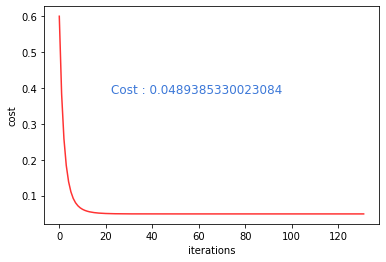

In [103]:
thetas_ct, costs_ct = gradient_descent_cost_threshold(train_x_scaled, train_y_scaled, theta, cost_diff_threshold, learning_rate)
plot_cost_vs_iterations(train_x_scaled, train_y_scaled, thetas_ct, costs_ct, costs_ct[-1])

## ploting costs vs iterations

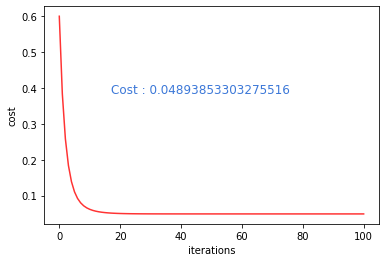

In [104]:
thetas_i, costs_i = gradient_descent_iterations(train_x_scaled, train_y_scaled, theta, 100, learning_rate)
plot_cost_vs_iterations(train_x_scaled, train_y_scaled, thetas_i, costs_i, costs_i[-1])

## Test Data Preparation

In [105]:
test_x_scaled, _, __ =  standardize(test_x, train_x_mean, train_x_std)
test_x_scaled = np.insert(test_x_scaled, 0, 1, axis = 1)

In [106]:
predicted_y_scaled = np.dot(test_x_scaled, thetas_ct[-1])
predicted_y_scaled.shape

(998, 1)

In [107]:
predicted_y = destandardize(predicted_y_scaled, train_y_mean, train_y_std)
predicted_y.shape

(998, 1)

# Calculating Mean Square Error

In [108]:
mse_gradient_descent = mse(predicted_y, test_y)
mse_gradient_descent

array(1.16455724e+10)

# Ploting test_y vs predicted_y

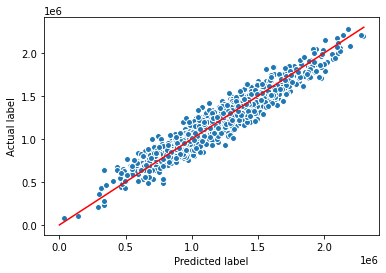

In [109]:
plt.scatter(test_y, predicted_y, edgecolor='white')
plt.plot([0,2.3e6], [0,2.3e6], 'r')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()